# Classification model evaluation in Machine Learning

### Imports

In [7]:
import numpy as np 
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

### Load data and add it to DataFrame

In [6]:
data = load_breast_cancer()
feature_names = data.feature_names
targets = data.target

df = pd.DataFrame(data=data["data"], columns=data["feature_names"])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Scale the data to prepare it for PCA decomposition

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)

scaled_data = scaler.transform(df)
scaled_data = pd.DataFrame(data=scaled_data, columns=feature_names)
scaled_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### Create and fit the model 

In [4]:
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

### Decompose the data using PCA

In [5]:
transformed_data = pca.transform(scaled_data)

print("Original data shape: ", scaled_data.shape)
print("Transformed data shape: ", transformed_data.shape)

trans_df = pd.DataFrame(data=transformed_data, columns=["principal_var_1", "principal_var_2"])
trans_df.head()

Original data shape:  (569, 30)
Transformed data shape:  (569, 2)


,principal_var_1,principal_var_2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


Text(0.5, 1.0, 'PCA data decomposition from 30D to 2D')

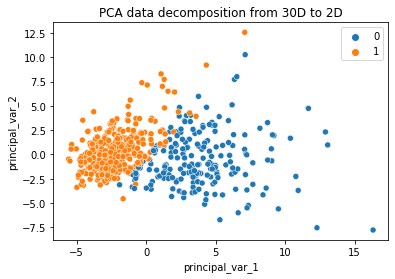

In [8]:
sn.scatterplot(data=trans_df, x="principal_var_1", y="principal_var_2", hue=targets)
plt.title("PCA data decomposition from 30D to 2D")

### Create and fit SVM model

In [18]:
X = trans_df
y = targets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

### Plot splitting line

Text(0.5, 1.0, 'SVM splitting line / Hyperplane')

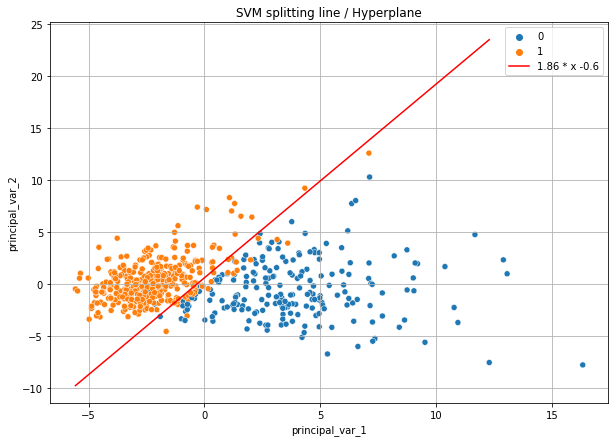

In [34]:
x_min, x_max = np.min(X_test["principal_var_1"]), np.max(X_test["principal_var_1"])

w1, w2, b = svm_model.coef_[0][0], svm_model.coef_[0][1], svm_model.intercept_[0]
x = np.linspace(x_min, x_max)
slope, bias = -(w1/w2), -b/w2
split_line = slope*x - bias

plt.figure(figsize=(10,7))
sn.scatterplot(data=trans_df, x="principal_var_1", y="principal_var_2", hue=targets)
plt.plot(x, split_line, c="r", label=f"{slope.round(2)} * x + {bias.round(2)}" if bias >= 0 else f"{slope.round(2)} * x {bias.round(2)}")
plt.legend()
plt.grid(True)
plt.title("SVM splitting line / Hyperplane")


## Model evaluation metrics

In [41]:
prediction = svm_model.predict(X_test)

### Accuracy

$$ \frac{\# \text{of correctly classified instances}}{\# \text{of all instances}} $$

In [69]:
def model_accuracy(y_true, y_pred, round=2):
    correct_preds = np.squeeze(np.where(y_true == y_pred))
    n_correct = len(correct_preds)
    n_all = len(y_true)
    accuracy = np.round(n_correct/n_all, round)
    return accuracy

accuracy = model_accuracy(y_test, prediction)
print(f"Accuracy of SVM model is: {accuracy}")

Accuracy of SVM model is: 0.96


### Precision & Recall

Precision is the percentage of correctly labeled positive instances (TP) out of all positive labelled instances (TP + FP).<br>
How many positive predictions are really positive (in %).<br>
<br>
Recall is the percentage of correctly labeled positive instaces (TP) out of all positive instances (TP + FN).<br>
How many positive members were identified as positive (in %).

- TP - True Positive (Positive labeled as positive)
- TN - True Negative (Negative labelled as negative)
- FP - False Positive (Negative labeled as positive)
- FN - False Negative (Positive labeled as negative)

$$ \text{Precision} = \frac{\text{TP}}{\text{TP + FP}} $$
$$ \text{Recall} = \frac{\text{TP}}{\text{TP + FN}} $$

In [92]:
def model_precision_recall(y_true, y_pred, round=2):
    correct_idxs = np.squeeze(np.where(y_true == y_pred))
    all_positive = len(np.squeeze(np.where(y_true == 1)))
    all_negative = len(np.squeeze(np.where(y_true == 0)))

    tp, tn = [], []

    for idx in correct_idxs:
        if y_pred[idx] == 1:
            tp.append(1)
        else: 
            tn.append(0)

    tp, tn = len(tp), len(tn)

    fn = all_positive - tp
    fp = all_negative - tn

    return np.round(tp/(tp + fp), round), np.round(tp/(tp + fn), round)

precision, recall = model_precision_recall(y_test, prediction)
print(f"Precision of SVM model is: {precision}")
print(f"Recall of SVM model is: {recall}")

Precision of SVM model is: 0.95
Recall of SVM model is: 1.0


### F1 score

F1 score is harmonic mean of precision and recall.

$$ \text{F1} = \frac{2}{1/\text{Precision} + 1/\text{Recall}} $$

Is it recommended to use PR (precision - recall)  or ROC curve when using F1 score to be sure about result.

In [94]:
def f1_score(y_true, y_pred, round=2):
    precision, recall = model_precision_recall(y_true, y_pred)
    return np.round(2/((1/precision) + (1/recall)), round)

f1 = f1_score(y_test, prediction)
print(f"F1 score of SVM model is: {f1}")

F1 score of SVM model is: 0.97


#### ROC curve and its AUC (Area Under the Curve)

- The Higher the AUC, the better model we got.

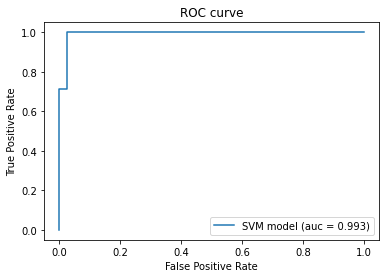

In [99]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

dec_f = svm_model.decision_function(X_test)
fpr, tpr, threshold = roc_curve(y_test, dec_f)
model_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label="SVM model (auc = %0.3f)" % model_auc)
plt.title("ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

#### PR (Precision - Recall) curve

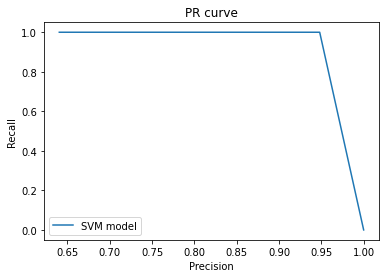

In [107]:
from sklearn.metrics import precision_recall_curve

prec, rec, thresholds = precision_recall_curve(y_test, prediction)

plt.plot(prec, rec, label="SVM model")
plt.title("PR curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

prediction = svm_model.predict(X_test)
cm = confusion_matrix(y_test, prediction)

plt.figure(figsize=(10,7))
sn.heatmap(data=cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")